In [2]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.resnet50 import preprocess_input
from keras.applications.resnet50 import decode_predictions
from keras.applications.resnet50 import ResNet50
from keras.utils import plot_model

In [60]:
image = load_img('sachin.jpg', target_size=(224,224))

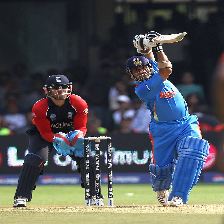

In [61]:
image

In [62]:
image = img_to_array(image)

In [63]:
image

array([[[ 16.,  19.,  26.],
        [ 16.,  19.,  26.],
        [ 16.,  19.,  26.],
        ...,
        [ 23.,  26.,  33.],
        [ 25.,  28.,  35.],
        [ 21.,  24.,  31.]],

       [[ 18.,  21.,  28.],
        [ 18.,  21.,  28.],
        [ 19.,  22.,  29.],
        ...,
        [ 21.,  24.,  31.],
        [ 23.,  26.,  33.],
        [ 20.,  23.,  30.]],

       [[ 21.,  24.,  31.],
        [ 21.,  24.,  29.],
        [ 21.,  24.,  29.],
        ...,
        [ 20.,  23.,  30.],
        [ 20.,  23.,  30.],
        [ 20.,  23.,  28.]],

       ...,

       [[190., 184., 122.],
        [188., 182., 122.],
        [195., 188., 133.],
        ...,
        [171., 168., 115.],
        [166., 162., 114.],
        [152., 147., 105.]],

       [[187., 183., 122.],
        [191., 187., 124.],
        [181., 177., 116.],
        ...,
        [173., 169., 121.],
        [164., 161., 116.],
        [144., 145., 103.]],

       [[198., 189., 132.],
        [196., 186., 127.],
        [193., 1

In [64]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [65]:
image.shape

(1, 224, 224, 3)

In [66]:
# prepare the image for the ResNet50 model
image = preprocess_input(image)

In [67]:
# load the model
model = ResNet50()

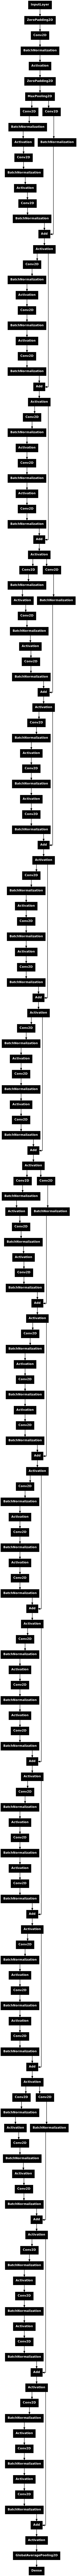

In [68]:
plot_model(model)

In [69]:
# predict the probability across all output classes
yhat = model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 854ms/step


In [70]:
yhat

array([[3.17714938e-10, 4.61628886e-08, 7.94487409e-09, 1.85136884e-08,
        1.94877803e-08, 5.43091516e-10, 5.52095536e-10, 1.28648807e-07,
        3.27424909e-09, 5.57887159e-09, 4.71988777e-08, 1.92251370e-08,
        4.69969086e-09, 4.40878112e-10, 6.74221639e-08, 1.80048602e-07,
        1.18178356e-07, 2.51609144e-05, 8.76116701e-07, 4.96566486e-08,
        1.88878357e-09, 2.04049115e-08, 5.41704743e-08, 2.67427769e-08,
        3.09384461e-07, 7.11203683e-08, 5.27795141e-09, 9.23949983e-09,
        3.75583760e-08, 8.57724003e-10, 2.05470241e-09, 8.14030017e-08,
        2.54655141e-09, 1.11757892e-08, 1.08845297e-08, 4.41097026e-09,
        1.19282380e-08, 1.24271073e-08, 1.27340627e-09, 1.32469946e-08,
        1.10454188e-08, 1.03988318e-09, 4.65891237e-09, 2.04675832e-09,
        1.01210089e-08, 2.29972514e-07, 4.87043472e-09, 6.67537936e-09,
        8.69818706e-09, 1.69567773e-08, 3.65243125e-07, 1.37586254e-08,
        1.18338761e-08, 2.77214895e-09, 8.77833717e-09, 6.307453

In [71]:
import numpy as np
np.argmax(yhat)

560

In [72]:
decode_predictions(yhat)[0][0][1]

'football_helmet'

In [76]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [74]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [75]:
x_train.shape

(50000, 32, 32, 3)

In [77]:
labels = ['airplane','automobile','bird','cat','deer','dog',
          'frog','horse','ship','truck']

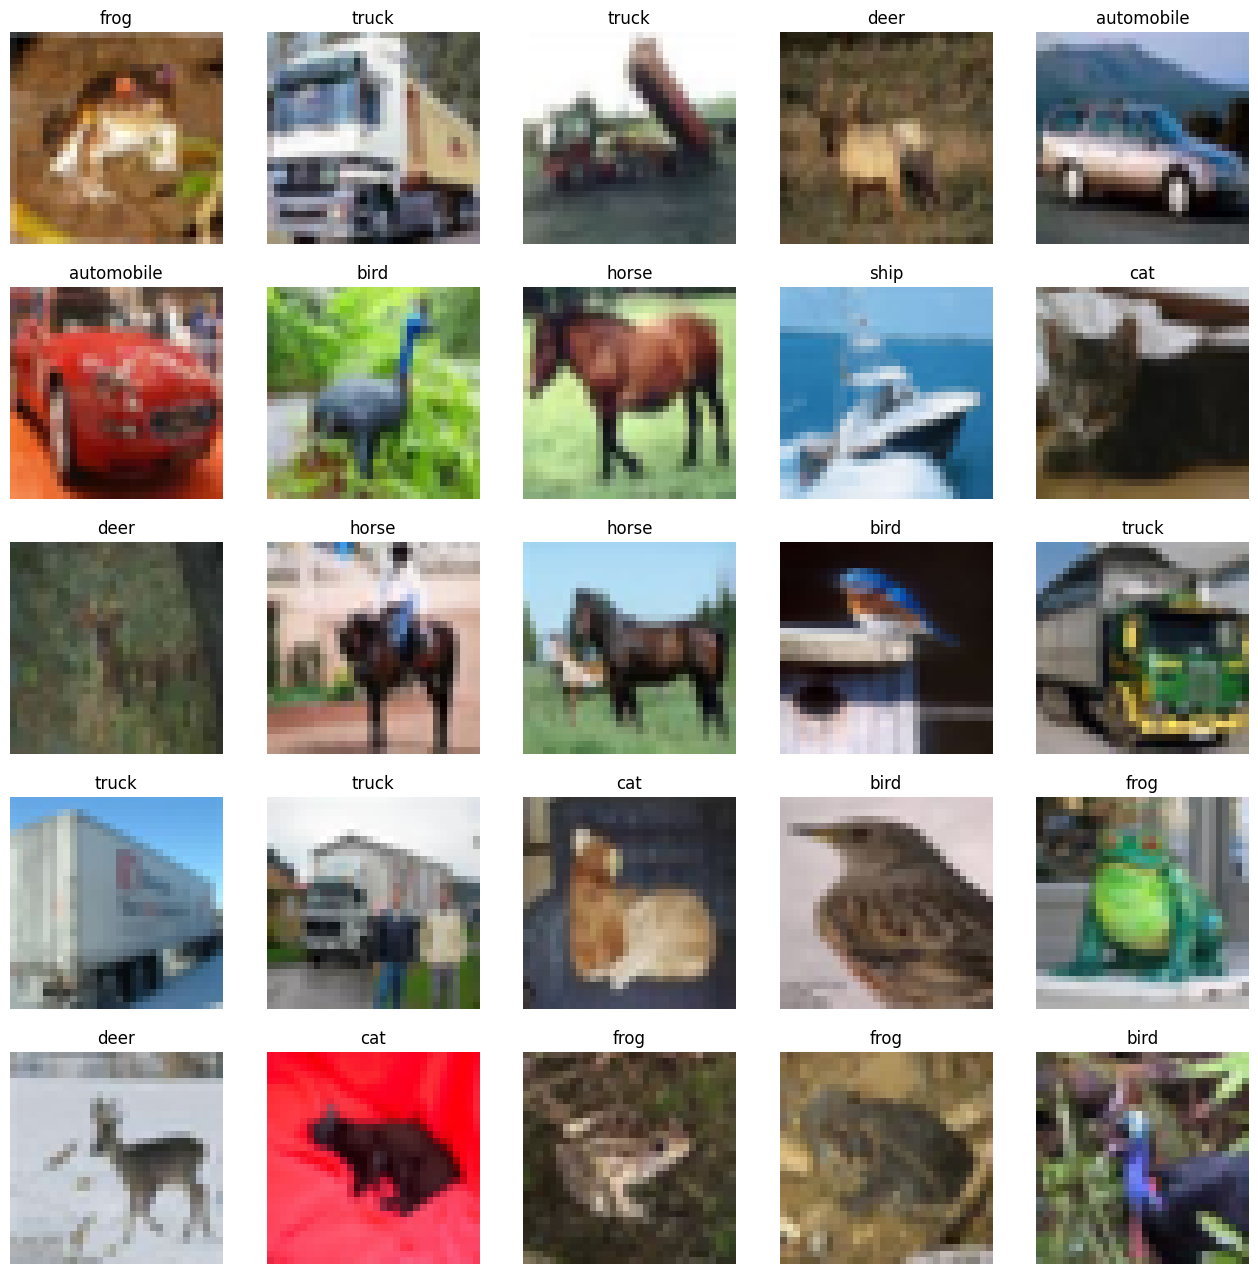

In [78]:
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(x_train[i])
    plt.title(labels[y_train[i][0]])

In [82]:
resnet50 = ResNet50(include_top=False, weights='imagenet',
                    input_shape=(32, 32, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 26s 0us/step


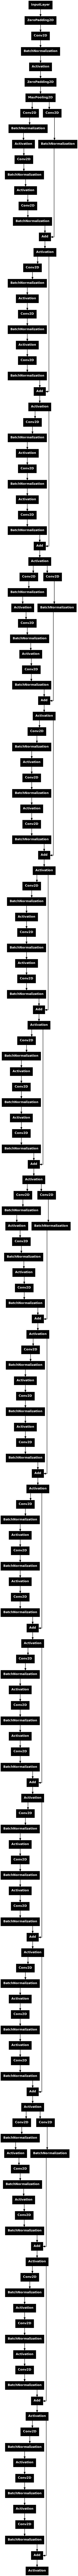

In [83]:
plot_model(resnet50)

In [87]:
from keras.layers import Flatten, Dense

In [88]:
#Flatten output layer of Resnet
flattened = Flatten()(resnet50.output)

#Fully connected layer 1
fc1 = Dense(128, activation='relu', name="AddedDense1")(flattened)

#Fully connected layer, output layer
fc2 = Dense(10, activation='softmax', name="AddedDense2")(fc1)

In [89]:
resnet50.trainable

True

In [90]:
resnet50.trainable = False

In [91]:
from keras.models import Model

In [92]:
model = Model(inputs=resnet50.inputs, outputs=fc2)

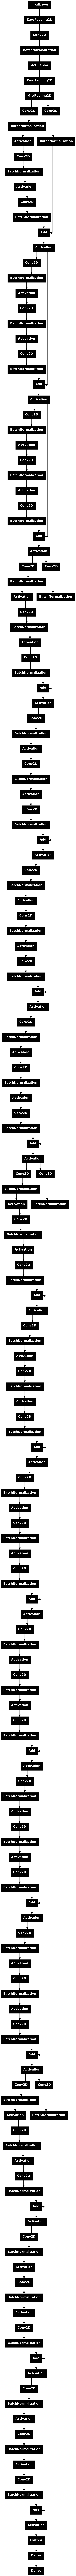

In [93]:
plot_model(model)

In [94]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [95]:
model.fit(x_train, y_train, epochs=2)

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 150s 94ms/step - accuracy: 0.4991 - loss: 1.5099
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 94ms/step - accuracy: 0.6281 - loss: 1.0626


In [110]:
image = load_img('cat.jpg', target_size=(32,32))

In [111]:
img_array = img_to_array(image)

In [112]:
img_new = img_array.reshape(1,32,32,3)

In [113]:
# detect the object
y = model.predict(img_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [118]:
labels[np.argmax(y)+1]

'cat'